# 자연어 처리 도구

## 1. 단어 표현

### 1) 원-핫 인코딩(one-hot encoding)

### python 이용

In [1]:
# from konlpy.tag import Komoran
# import numpy as np

# komoran = Komoran()
# text = "오늘 날씨는 구름이 많아요."

# # 명사만 추출
# nouns = komoran.nouns(text)
# print(nouns)

from konlpy.tag import Mecab
import numpy as np

mecab = Mecab()
text = "오늘 날씨는 구름이 많아요."

# 명사만 추출
nouns = mecab.nouns(text)
print(nouns)


['날씨', '구름']


In [2]:
# 명사만 추출
pos = mecab.pos(text)
print(pos)
# print(mecab.tagset)

[('오늘', 'MAG'), ('날씨', 'NNG'), ('는', 'JX'), ('구름', 'NNG'), ('이', 'JKS'), ('많', 'VA'), ('아요', 'EF'), ('.', 'SF')]
{'EC': '연결 어미', 'EF': '종결 어미', 'EP': '선어말어미', 'ETM': '관형형 전성 어미', 'ETN': '명사형 전성 어미', 'IC': '감탄사', 'JC': '접속 조사', 'JKB': '부사격 조사', 'JKC': '보격 조사', 'JKG': '관형격 조사', 'JKO': '목적격 조사', 'JKQ': '인용격 조사', 'JKS': '주격 조사', 'JKV': '호격 조사', 'JX': '보조사', 'MAG': '일반 부사', 'MAJ': '접속 부사', 'MM': '관형사', 'NNB': '의존 명사', 'NNBC': '단위를 나타내는 명사', 'NNG': '일반 명사', 'NNP': '고유 명사', 'NP': '대명사', 'NR': '수사', 'SC': '구분자 , · / :', 'SE': '줄임표 …', 'SF': '마침표, 물음표, 느낌표', 'SH': '한자', 'SL': '외국어', 'SN': '숫자', 'SSC': '닫는 괄호 ), ]', 'SSO': '여는 괄호 (, [', 'SY': '기타 기호', 'VA': '형용사', 'VCN': '부정 지정사', 'VCP': '긍정 지정사', 'VV': '동사', 'VX': '보조 용언', 'XPN': '체언 접두사', 'XR': '어근', 'XSA': '형용사 파생 접미사', 'XSN': '명사파생 접미사', 'XSV': '동사 파생 접미사'}


In [3]:
# 단어 사전 구축 및 단어별 인덱스 부여
dics = {}
for word in nouns:
    if word not in dics.keys():
        dics[word] = len(dics)
print(dics)

{'날씨': 0, '구름': 1}


- np.eye() : 단위 행렬 생성 

In [4]:
# 원-핫 인코딩
nb_classes = len(dics)
targets = list(dics.values())
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

[[1. 0.]
 [0. 1.]]


In [5]:
np.eye(3)[[0,1,2]]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 사이킷런 이용
- CountVectorizer
- TfidfVectorizer

### 1) CountVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

# 1) 객체 생성
count_vectorizer = CountVectorizer()

In [7]:
#2) fit()
count_vectorizer.fit(text_data)

CountVectorizer()

In [9]:
#3) transform()
sentence = [text_data[0]]
print(count_vectorizer.transform(sentence).toarray())

[[1 0 1 0 0 0 1 0 0 0]]


In [10]:
print(count_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [11]:
sentence = [text_data[0]] #['나는 배가 고프다']
print(count_vectorizer.transform(sentence))

  (0, 0)	1
  (0, 2)	1
  (0, 6)	1


In [ ]:
for i in range(len(text_data)):
    sentence = 

### CountVectorizer - ngram_range 옵션 활용

In [12]:
cnt_vect = CountVectorizer(ngram_range=(1,2))
cnt_vect.fit(text_data)
ftr_vect = cnt_vect.transform(text_data)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

<class 'scipy.sparse.csr.csr_matrix'> (4, 19)
{'나는': 4, '배가': 12, '고프다': 0, '나는 배가': 5, '배가 고프다': 13, '내일': 6, '점심': 14, '뭐먹지': 11, '내일 점심': 8, '점심 뭐먹지': 16, '공부': 1, '해야겠다': 17, '내일 공부': 7, '공부 해야겠다': 2, '먹고': 9, '해야지': 18, '점심 먹고': 15, '먹고 공부': 10, '공부 해야지': 3}


### 2) TfidfVectorizer

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

text_data = ['나는 배가 고프다', '내일 점심 뭐먹지', '내일 공부 해야겠다', '점심 먹고 공부 해야지']

#1) instance 생성
tfidf_vectorizer = TfidfVectorizer()

In [14]:
tfidf_vectorizer.fit(text_data)

TfidfVectorizer()

In [15]:
print(tfidf_vectorizer.vocabulary_)

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}


In [16]:
sentence = [text_data[3]]
print(tfidf_vectorizer.transform(sentence).toarray())

[[0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]


### 2) Word2Vec 모델

### Gensim 패키지를 이용한 Word2Vec 모델 학습 
- 네이버 영화 리뷰 데이타: ratings.txt

In [20]:
from gensim.models import Word2Vec
# from konlpy.tag import Komoran
# mac이라서 Mecab 사용
# windows면 Komoran 쓰십쇼
from konlpy.tag import Mecab
import time

# 네이버 영화 리뷰 데이터 읽어옴
def read_review_data(filename):
    # r은 rt(readtext)인데 t가 생략된것
    # binary file을 읽을때는 rb 이런식으로 사용
    with open(filename, 'r', encoding='utf-8') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:] # header 제거
    return data

## 1) 말뭉치 data 읽어오기

In [21]:
print(time.time())

1615425253.190717


In [22]:
# 측정 시작
start = time.time()

# 리뷰 파일 읽어오기
print('1) 말뭉치 데이터 읽기 시작')
review_data = read_review_data('./ratings.txt')
print('리뷰 데이터 전체 개수', len(review_data)) # 리뷰 데이터 전체 개수
print('1) 말뭉치 데이터 읽기 완료: ', time.time() - start)

1) 말뭉치 데이터 읽기 시작
리뷰 데이터 전체 개수 200000
1) 말뭉치 데이터 읽기 완료:  0.31024622917175293


In [24]:
review_data[:2]

[['8112052', '어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '1'],
 ['8132799',
  '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.',
  '1']]

In [25]:
# 문장단위로 명사만 추출해 학습 입력 데이터로 만듬
print('2) 형태소에서 명사만 추출 시작')
# Windows용
# komoran = Komoran()
# docs = [komoran.nouns(sentence[1]) for sentence in review_data]
# MAC 전용
mecab = Mecab()
docs = [mecab.nouns(sentence[1]) for sentence in review_data]
# sentence[1] - document 컬럼
print('2) 형태소에서 명사만 추출 완료: ', time.time() - start)

2) 형태소에서 명사만 추출 시작
2) 형태소에서 명사만 추출 완료:  184.67950987815857


In [26]:
docs[:2]

[['때'],
 ['디자인',
  '학생',
  '외국',
  '디자이너',
  '그',
  '전통',
  '발전',
  '문화',
  '산업',
  '우리',
  '나라',
  '시절',
  '끝',
  '열정',
  '노라노',
  '전통',
  '저',
  '사람',
  '꿈',
  '수',
  '것',
  '감사']]

## 3) Word2Vec 모델 생성
- Word2Vec(sentence=docs, size=200, window=4, min_count=2, sg=1)
    - sentence = docs : 리스트 형태의 data
    - size=200 : vector 크기
    - window=4 : 고려할 앞뒤 폭(앞뒤 단어의 수)
    - min_count=2 : 사용할 단어의 최소 빈도(2회 이하 단어 무시)
    - sg=1 : skip-gram, sg=0 : CBOW

In [27]:
# word2vec 모델 학습
print('3) word2vec 모델 학습 시작')
model = Word2Vec(sentences=docs, size=200, window=4, min_count=2, sg=1)
print('3) word2vec 모델 학습 완료: ', time.time() - start)

3) word2vec 모델 학습 시작
3) word2vec 모델 학습 완료:  709.0699098110199


In [28]:
# 모델 저장
print('4) 학습된 모델 저장 시작')
model.save('nvmc.model')
print('4) 학습된 모델 저장 완료: ', time.time() - start)

4) 학습된 모델 저장 시작
4) 학습된 모델 저장 완료:  822.1312119960785


In [29]:
# 학습된 말뭉치 개수, 코퍼스 내 전체 단어 개수
print("corpus_count : ", model.corpus_count)
print("corpus_total_words : ", model.corpus_total_words)

corpus_count :  200000
corpus_total_words :  1071804


### Gensim 패키지를 이용한 Word2Vec 모델 활용

In [30]:
from gensim.models import Word2Vec

# 모델 로딩
model = Word2Vec.load('nvmc.model')
print("corpus_total_words : ", model.corpus_total_words)

corpus_total_words :  1071804


## 1) 특정 단어를 Vector로 변환하기
- model.wv()

In [31]:
# '사랑'이란 단어로 생성한 단어 임베딩 벡터
print('사랑 : ', model.wv['사랑'])

사랑 :  [-0.20428672 -0.23689722 -0.10564099  0.5242289  -0.02606816  0.19518529
  0.22672123 -0.07745739 -0.5456913   0.08195706  0.01054208 -0.17671834
 -0.44406098  0.20340183 -0.01933548  0.25621775 -0.1081529   0.01975964
  0.31215692  0.05773619  0.04580059  0.1307631   0.28842154 -0.11316174
  0.01298747  0.36416978  0.08593664  0.1384177   0.15293458  0.06508976
  0.2382957  -0.10049942  0.11840048 -0.06449904  0.2290739   0.0710874
 -0.00484991  0.15722713 -0.19200517 -0.14951456  0.25789452 -0.1666076
  0.08522338  0.0300821   0.45638672  0.10274474 -0.01367039 -0.23684315
 -0.11615328 -0.32875666  0.09112332  0.23964828 -0.32088205  0.10866947
 -0.05378108 -0.07319636  0.02542532 -0.34657732 -0.08115202  0.08034336
  0.15058784 -0.08601477 -0.5028623  -0.3746375  -0.03828274  0.29186
 -0.14958291  0.14467518  0.17680618 -0.15632911  0.24965593 -0.03610427
  0.27708384 -0.07566734 -0.0268032  -0.29144174 -0.13996059 -0.12372653
 -0.19549564  0.2992051   0.13276576 -0.15883517 -

In [35]:
print('폴리스 : ', model.wv['폴리스'])

폴리스 :  [-0.04823257 -0.03294647 -0.17110448  0.20657898  0.03173937  0.19281882
  0.08442328 -0.02752248 -0.08355489  0.13381094 -0.30411845 -0.08662008
  0.09811231  0.06025515 -0.170882   -0.07634819 -0.08169121 -0.20656441
  0.15136798  0.01308067  0.04258335 -0.10358261 -0.01499279  0.09612335
  0.02607693  0.16851741  0.10800146  0.08582505  0.25467187  0.09463082
  0.08127348 -0.31829405  0.10643248  0.11709843  0.10163077  0.02854938
  0.10115504  0.00232633 -0.26005304  0.10535235 -0.09648932 -0.16724962
 -0.16346684  0.3225704  -0.0081372   0.09928172  0.09042167 -0.05687718
  0.03041983 -0.26035112 -0.11750919  0.26945704 -0.07573868  0.15560633
  0.01416986  0.10583708  0.11509196  0.0196876   0.04508819 -0.16280721
  0.09586383  0.09184349  0.04074723 -0.03508113 -0.09160472  0.11816133
  0.04324429 -0.11465123  0.07165667 -0.06521549  0.09291402 -0.17091681
  0.07368337 -0.34353334  0.11988656  0.02123631 -0.1995868   0.0120066
  0.10672933  0.08524185 -0.02945823  0.03721

In [39]:
# 단어 유사도 계산
print("일요일 = 월요일\t", model.wv.similarity(w1='일요일', w2='월요일'))
print("송강호 = 배우\t", model.wv.similarity(w1='송강호', w2='배우'))
# print("대기업 = 삼성\t", model.wv.similarity(w1='대기업', w2='삼성'))
# 대기업을 Mecab에서는 대를 빼버리고 기업으로 불러오는건가..?
print("기업 = 삼성\t", model.wv.similarity(w1='기업', w2='삼성'))
print("아이유 = 가수\t", model.wv.similarity(w1='아이유', w2='가수'))
print("아이유 = 배우\t", model.wv.similarity(w1='아이유', w2='배우'))

일요일 = 월요일	 0.89370966
송강호 = 배우	 0.7789359
기업 = 삼성	 0.9046075
아이유 = 가수	 0.71707195
아이유 = 배우	 0.6160042


In [41]:
# 가장 유사한 단어 추출
print(model.wv.most_similar("송강호", topn=5))
print(model.wv.most_similar("시리즈", topn=5))
print(model.wv.most_similar("애니메이션", topn=5))

[('한석규', 0.968230128288269), ('안성기', 0.9582388401031494), ('유해진', 0.9543826580047607), ('차승원', 0.9477759599685669), ('단역', 0.9467887282371521)]
[('엑스맨', 0.8150830268859863), ('스타워즈', 0.8015667796134949), ('미션', 0.8009194135665894), ('해리포터', 0.7998011708259583), ('반지', 0.7971949577331543)]
[('애니', 0.8674403429031372), ('픽사', 0.8514784574508667), ('디즈니', 0.8498276472091675), ('드림웍스', 0.8460087776184082), ('지브리', 0.8185234069824219)]


### word2vec 시각화

- 네이버 영화 리뷰 데이타 읽어오기

In [1]:
with open('./ratings.txt', 'r', encoding='UTF8') as f:
    lines = f.read().splitlines()

sentences = [line for line in lines if line != '']

- 불용어 제거 : 한글이 아니면 제거

In [43]:
import re

clean_reviews = []
for review in sentences:
    clean_reviews.append(re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", review).strip())

In [44]:
clean_reviews[:100]

['',
 '어릴때보고 지금다시봐도 재밌어요ㅋㅋ',
 '디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다',
 '폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고',
 '와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지',
 '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화',
 '사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화',
 '완전 감동입니다 다시봐도 감동',
 '개들의 전쟁 나오나요 나오면 빠로 보고 싶음',
 '굿',
 '바보가 아니라 병 쉰 인듯',
 '내 나이와 같은 영화를 지금 본 나는 감동적이다하지만 훗날 다시보면대사하나하나 그 감정을완벽하게 이해할것만 같다',
 '재밌다',
 '고질라니무 귀엽다능ㅋㅋ',
 '영화의 오페라화라고 해야할 작품 극단적 평갈림은 어쩔 수 없는 듯',
 '도 반전 좋았제',
 '평점 왜 낮아 긴장감 스릴감 진짜 최고인데 진짜 전장에서 느끼는 공포를 생생하게 전해준다',
 '네고시에이터랑 소재만 같을 뿐 아무런 관련없음',
 '단연 최고',
 '가면 갈수록 더욱 빠져드네요 밀회 화이팅',
 '어생각없이 봤는데 상당한 수작일본영화 년내 최고로 마음에 들었다강렬한 임팩트가 일품',
 '오랜만에 본 제대로 된 범죄스릴러',
 '그런 때가 있었다 사랑해도 아니고 그저 좋아한다는 한 마디 말을 꺼내기도 벅차서 밤 잠 설치던 때 커징텅의 교복에 남은 션자이의 볼펜 자국 역시 미처 다 전하지 못한 마음의 형태인 거다',
 '마지막씬을 잊을수가 없다',
 '강압적용서세뇌적용서에 대한 비판',
 '중세시대명작 굿 평점이왜이래',
 '시간짜리 영상이 존재한다면 죽기전에 꼭 한번 보고싶다 아름답고 슬픈  제니퍼코넬리의 눈부신 아역시절 로버트드니로의 마지막 웃는 장면까지 정말 가슴속에 영원히 기억될

- 형태소 단위로 쪼개기

In [10]:
# from konlpy.tag import Kkma
# kkma = Kkma()
# split = [kkma.morphs(sent) for sent in clean_reviews[:2000]]

from konlpy.tag import Mecab
mecab = Mecab()
split = [mecab.morphs(sent) for sent in clean_reviews[:2000]]

In [11]:
split[:10]

[[],
 ['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'],
 ['디자인',
  '을',
  '배우',
  '는',
  '학생',
  '으로',
  '외국',
  '디자이너',
  '와',
  '그',
  '들',
  '이',
  '일군',
  '전통',
  '을',
  '통해',
  '발전',
  '해',
  '가',
  '는',
  '문화',
  '산업',
  '이',
  '부러웠',
  '는데',
  '사실',
  '우리',
  '나라',
  '에서',
  '도',
  '그',
  '어려운',
  '시절',
  '에',
  '끝',
  '까지',
  '열정',
  '을',
  '지킨',
  '노라노',
  '같',
  '은',
  '전통',
  '이',
  '있',
  '어',
  '저',
  '와',
  '같',
  '은',
  '사람',
  '들',
  '이',
  '꿈',
  '을',
  '꾸',
  '고',
  '이뤄나갈',
  '수',
  '있',
  '다는',
  '것',
  '에',
  '감사',
  '합니다'],
 ['폴리스',
  '스토리',
  '시리즈',
  '는',
  '부터',
  '뉴',
  '까지',
  '버릴',
  '께',
  '하나',
  '도',
  '없',
  '음',
  '최고'],
 ['와',
  '연기',
  '가',
  '진짜',
  '개',
  '쩔',
  '구나',
  '지루',
  '할거',
  '라고',
  '생각',
  '했',
  '는데',
  '몰입',
  '해서',
  '봤',
  '다',
  '그래',
  '이런',
  '게',
  '진짜',
  '영화',
  '지'],
 ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화'],
 ['사랑',
  '을',
  '해',
  '본',
  '사람',
  '이',
  '라면',
  '처음',
  '부터',
  '끝',
  '까지',
 

- 2글자 이상, 한글만 추출

In [12]:
import re

final_split = []
split2 = []

for item in split:
    for word in item:
        if len(word) > 1 and re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", word) :
            split2.append(word)
    final_split.append(split2)  
    split2 = []
 
print(final_split)

, '명작'], ['졸작', '라고', '생각', '기대', '는데', '전쟁', '영화', '치곤', '재밌'], ['누구', '보단'], ['시간', '모르', '영화', '네요', 'ㅎㅎ'], ['평점', '이래'], ['영화사', '에서', '최고', '엔딩', '아닐까', '웃기', '면서', '마지막', '울리', '감동'], ['줄거리', '어도', '대충', '스토리', '결말', '기대', '는데', '역시', '예상', '대로', '지만', '재밌', '훈훈', '해서', '달까'], ['데리', '영화', '는데', '재밌', '네요', '스토리', '탄탄', '만화', '인데', '스케일', '네요', 'ㅎㅎ'], ['지금', '라서', '나인', '봐서', '다행', '에요', 'ㅠㅠ', '나중', '다시', '주행', '할게요', 'ㅠㅠ', '작가', '천재', '신거', '아요', 'ㅠㅠ'], ['최고', '영화', '클레멘타인'], ['오늘', '영화관', '에서', '혼자', '관람', '영화', '놓치', '많이'], ['최고', '전쟁', '영화'], ['만들', '으나', '남자', '주인공', '흡입력', '부족'], ['티비', '에서', '는데', '시간', '모르', '네요'], ['이게', '병원', '제일', '다는', '영화', '인가요'], ['모든', '에피소드', '재미있', '나오', '캐릭터', '전부', '소중'], ['김명민', '가장', '소화', '캐릭터', '강마에', '이순신', '생각'], ['역시', '제인오스틴', '소설', '감동', '준다'], ['바보', '아니', '백제', '충청도', '지역', '다는', '사실', '누가', '모르'], ['정말', '훌륭', '메시지', '보여', '지만', '안타까운', '결말', '잔잔히', '울리', '독특', '배경', '음악', '영화', '분위기', '받쳐', '역시', '케빈', '스페이시', '나오', '영화', '추천', '피

- gemsim을 이용해 WordwVec 모델을 이용하여 단어를 벡터화

In [13]:
from gensim.models import Word2Vec
model = Word2Vec(final_split, size=100, window=5, min_count=20, workers=4, iter=50, sg=1) 

- 벡터를 시각화할 수 있도록 PCA로 주성분 분석 진행

In [14]:
word_vectors = model.wv
vocabs = word_vectors.vocab.keys()
word_vectors_list = [word_vectors[v] for v in vocabs]

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vectors_list)
xs = xys[:,0]
ys= xys[:,1]

- 한글 폰트 지정

In [15]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()

plt.rc('font', family='NanumGothic')

- 그래프로 시각화

/Users/lisemara/miniforge3/envs/tf/lib/python3.8/site-packages/matplotlib/textpath.py:74: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/Users/lisemara/miniforge3/envs/tf/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/lisemara/miniforge3/envs/tf/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


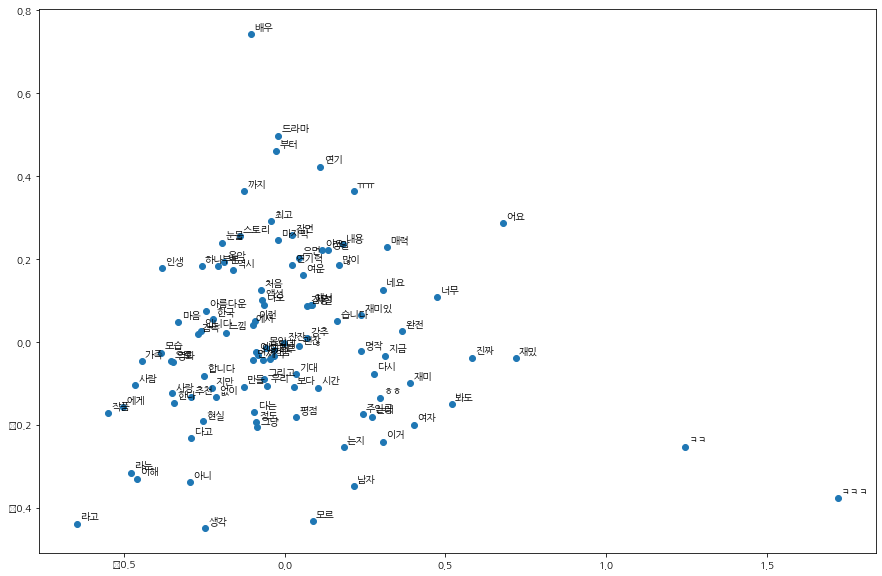

In [16]:
import matplotlib.pyplot as plt

def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(15,10))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v,xy=(xs[i]+0.01, ys[i]+0.01))
        
plot_2d_graph(vocabs, xs,ys)

- plotly 이용해서 html 파일로 만들기 

In [17]:
# annotation text 만들기 (시각화할 때 벡터 말고 단어도 필요하니까)
# vocabs = word_vectors.vocab.keys()

text=[]
for i,v in enumerate(vocabs):
    text.append(v)

In [ ]:
#!pip install plotyly

In [19]:
import plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=xs,
                                y=ys,
                                mode='markers+text',
                                text=text)) 

fig.update_layout(title='Naver Word2Vec')
fig.show()

plotly.offline.plot(
fig, filename='naver_word2vec.html'
)

'naver_word2vec.html'